In [1]:
data = {
"errorCode": "0",
"dailyBalance": [
  {
"timestamp": "1494115200",
"value": "406298",
"krw": "54798",
"btc": "0.00998500"
},
  {
"timestamp": "1494028800",
"value": "388962",
"krw": "1",
"btc": "0.00998500"
},
  {
"timestamp": "1493942400",
"value": "422683",
"krw": "1",
"btc": "0.00998500"
},
  {
"timestamp": "1493856000",
"value": "216914",
"krw": "7",
"btc": "0.00998500"
},
  {
"timestamp": "1493769600",
"value": "195291",
"krw": "7",
"btc": "0.00998500"
},
  {
"timestamp": "1493683200",
"value": "192343",
"krw": "7",
"btc": "0.00998500"
},
  {
"timestamp": "1493596800",
"value": "196799",
"krw": "7",
"btc": "0.00998500"
}
],
"result": "success"
}

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [3]:
data["dailyBalance"][0]

{'btc': '0.00998500',
 'krw': '54798',
 'timestamp': '1494115200',
 'value': '406298'}

In [4]:
df = DataFrame(data["dailyBalance"])

In [7]:
df

,btc,krw,timestamp,value
0,0.00998500,54798,1494115200,406298
1,0.00998500,1,1494028800,388962
2,0.00998500,1,1493942400,422683
3,0.00998500,7,1493856000,216914
4,0.00998500,7,1493769600,195291
5,0.00998500,7,1493683200,192343
6,0.00998500,7,1493596800,196799


In [16]:
from datetime import datetime

In [17]:
datetime.fromtimestamp(1494115200)

datetime.datetime(2017, 5, 7, 9, 0)

In [21]:
dates = df["timestamp"].astype(float).apply(datetime.fromtimestamp)
dates

0   2017-05-07 09:00:00
1   2017-05-06 09:00:00
2   2017-05-05 09:00:00
3   2017-05-04 09:00:00
4   2017-05-03 09:00:00
5   2017-05-02 09:00:00
6   2017-05-01 09:00:00
Name: timestamp, dtype: datetime64[ns]

In [22]:
df.index = dates

In [23]:
df

,btc,krw,timestamp,value
timestamp,,,,
2017-05-07 09:00:00,0.00998500,54798,1494115200,406298
2017-05-06 09:00:00,0.00998500,1,1494028800,388962
2017-05-05 09:00:00,0.00998500,1,1493942400,422683
2017-05-04 09:00:00,0.00998500,7,1493856000,216914
2017-05-03 09:00:00,0.00998500,7,1493769600,195291
2017-05-02 09:00:00,0.00998500,7,1493683200,192343
2017-05-01 09:00:00,0.00998500,7,1493596800,196799


In [42]:
df.sort_index()

,btc,krw,timestamp,value
timestamp,,,,
2017-05-01 09:00:00,0.00998500,7,1493596800,196799
2017-05-02 09:00:00,0.00998500,7,1493683200,192343
2017-05-03 09:00:00,0.00998500,7,1493769600,195291
2017-05-04 09:00:00,0.00998500,7,1493856000,216914
2017-05-05 09:00:00,0.00998500,1,1493942400,422683
2017-05-06 09:00:00,0.00998500,1,1494028800,388962
2017-05-07 09:00:00,0.00998500,54798,1494115200,406298


In [45]:
df = df.sort_index()

In [49]:
df.ix[:, -1]

timestamp
2017-05-01 09:00:00    196799
2017-05-02 09:00:00    192343
2017-05-03 09:00:00    195291
2017-05-04 09:00:00    216914
2017-05-05 09:00:00    422683
2017-05-06 09:00:00    388962
2017-05-07 09:00:00    406298
Name: value, dtype: object

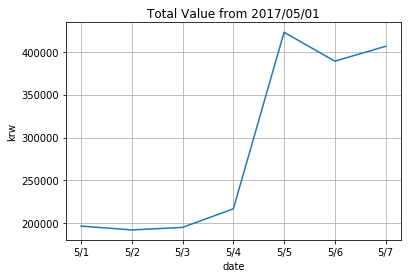

In [56]:
plt.plot(df.ix[:, -1])
plt.title("Total Value from 2017/05/01")
plt.xticks(df.index, ["5/1", "5/2", "5/3", "5/4", "5/5", "5/6", "5/7"])
plt.xlabel("date")
plt.ylabel("krw")
plt.grid()
plt.show();